# LOAN PREDICTION MODEL

## 1905639:Soham Chakraborty
## 1905826:Rajdeep Chakraborty
## 1905452:Ashutosh Senapati
## 1905819:Souvik Bhattacharya

# Importing Libraries and Reading Data Set

1)Importing all the required libraries

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
%matplotlib inline
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

2)Read and Display Training Data

In [380]:
Training_Data=pd.read_csv(r"./DataSet/train_set.csv")
Training_Data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [381]:
Training_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [382]:
Training_Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [383]:
Training_Data.shape

(614, 13)

# Data Cleaning

1) Check for Duplicate Rows

In [384]:
print("Number of duplicate rows in the data set: ",len(Training_Data[Training_Data.duplicated(Training_Data.columns)]))

Number of duplicate rows in the data set:  0


2) Check for Null data and count of Null data

In [385]:
Training_Data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [386]:
Training_Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

3)Removing Null data from the set

In [387]:
Training_Data["Gender"].fillna(Training_Data["Gender"].mode()[0],inplace=True)
Training_Data["Married"].fillna(Training_Data["Married"].mode()[0],inplace=True)
Training_Data["Dependents"].fillna(Training_Data["Dependents"].mode()[0],inplace=True)
Training_Data["Self_Employed"].fillna(Training_Data["Self_Employed"].mode()[0],inplace=True)
Training_Data["LoanAmount"].fillna(Training_Data["LoanAmount"].mean(),inplace=True)
Training_Data["Loan_Amount_Term"].fillna(Training_Data["Loan_Amount_Term"].mode()[0],inplace=True)
Training_Data["Credit_History"].fillna(Training_Data["Credit_History"].mode()[0],inplace=True)

In the above cell we applied mode() for categorical elements and mean() for non-categorical elements to fill the null values.
Note:We could have dropped the rows having null values in its columns,but in doing so would have lost a huge chunk of our data. 

4)Check if all Null values are removed

In [388]:
Training_Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We see that Null values are no longer present

5) We have to now check for outliers

In [389]:
Training_Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We see that for ApplicantIncome,CoapplicantIncome and LoanAmount there is a significant difference between max and mean values,and thus we need to visualize them to check for outliers.

<AxesSubplot:>

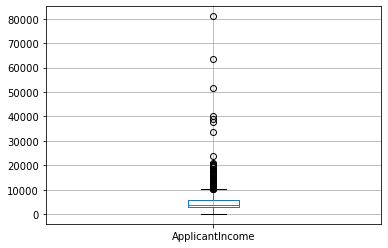

In [390]:
Training_Data.boxplot(column="ApplicantIncome")

<AxesSubplot:>

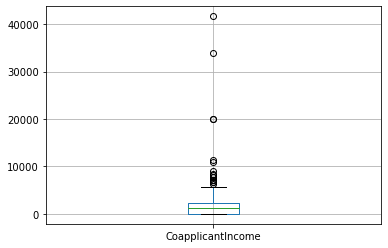

In [391]:
Training_Data.boxplot(column="CoapplicantIncome")

<AxesSubplot:>

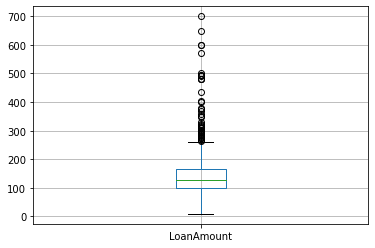

In [392]:
Training_Data.boxplot(column="LoanAmount")

The above box plots show us that there are outliers present and thus we need to handle them.

6) We need to visualize the histograms and normalize the data in the above mentioned columns

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>]], dtype=object)

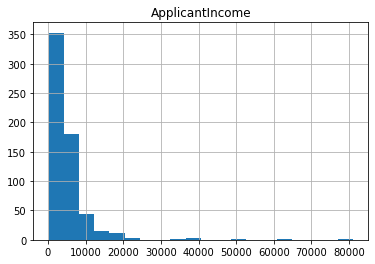

In [393]:
Training_Data.hist(column="ApplicantIncome", bins=20)

array([[<AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

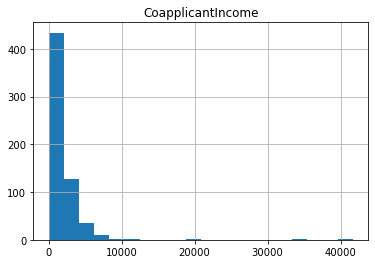

In [394]:
Training_Data.hist(column="CoapplicantIncome", bins=20)

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

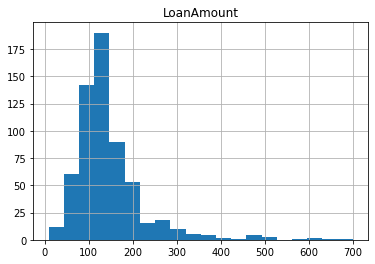

In [395]:
Training_Data.hist(column="LoanAmount", bins=20)

To normalize the data:
step1)We take a column called TotalIncome_log which has the log values of the sum of Applicant and CoapplicantIncome columns
step2)We take a column called LoanAmount_log which has the log values of the LoanAmount column

In [396]:
Training_Data["TotalIncome_log"]=np.log(Training_Data["ApplicantIncome"]+Training_Data["CoapplicantIncome"])
Training_Data["LoanAmount_log"]=np.log(Training_Data["LoanAmount"])

7)Check the new columns

In [397]:
Training_Data["TotalIncome_log"]

0      8.674026
1      8.714568
2      8.006368
3      8.505323
4      8.699515
         ...   
609    7.972466
610    8.320205
611    9.025456
612    8.933664
613    8.430109
Name: TotalIncome_log, Length: 614, dtype: float64

In [398]:
Training_Data["LoanAmount_log"]

0      4.986426
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount_log, Length: 614, dtype: float64

# Data Visualization

1)We now visualize the TotalIncome_log column and LoanAmount_log

array([[<AxesSubplot:title={'center':'TotalIncome_log'}>]], dtype=object)

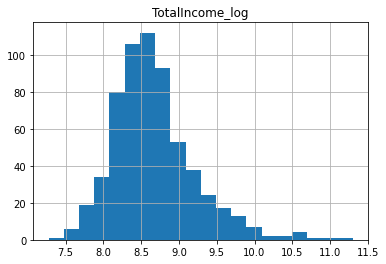

In [399]:
Training_Data.hist(column="TotalIncome_log", bins=20)

array([[<AxesSubplot:title={'center':'LoanAmount_log'}>]], dtype=object)

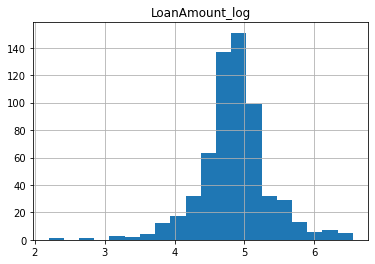

In [400]:
Training_Data.hist(column="LoanAmount_log", bins=20)

2)We visualize the scatterplot between TotalIncome_log and LoanAmount_log

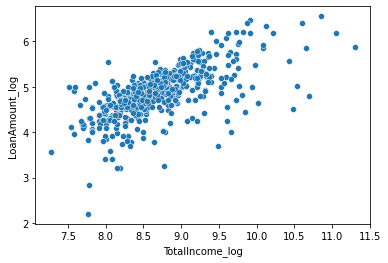

In [401]:
sn.scatterplot(x=Training_Data.TotalIncome_log, y=Training_Data.LoanAmount_log);

3)We need to visualize the correlation Matrix of the dataset

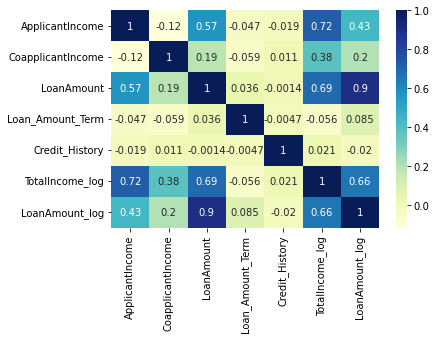

In [402]:
dataplot = sn.heatmap(Training_Data.corr(), cmap="YlGnBu", annot=True)
p.show()

The above heatmap shows the correlation between those columns having numeric data in them and thus we need to transform the other columns to numeric data types

# Feature Engineering:Handling Categorical Variables

1)Display the table to find the columns to encode using a label encoder

In [403]:
Training_Data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,4.948760


Ignoring Loan_ID we need to encode Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status

2)Using a label encoder we encode the columns

In [404]:
LE_Train_Data=LabelEncoder()
Training_Data["Gender"]=LE_Train_Data.fit_transform(Training_Data["Gender"])
Training_Data["Married"]=LE_Train_Data.fit_transform(Training_Data["Married"])
Training_Data["Dependents"]=LE_Train_Data.fit_transform(Training_Data["Dependents"])
Training_Data["Education"]=LE_Train_Data.fit_transform(Training_Data["Education"])
Training_Data["Self_Employed"]=LE_Train_Data.fit_transform(Training_Data["Self_Employed"])
Training_Data["Property_Area"]=LE_Train_Data.fit_transform(Training_Data["Property_Area"])
Training_Data["Loan_Status"]=LE_Train_Data.fit_transform(Training_Data["Loan_Status"])

In [405]:
Training_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,8.674026,4.986426
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,8.714568,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,8.006368,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,8.505323,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,8.699515,4.948760


We see that the encoding has performed successfully.Now we can draw the heat map in next stage for feature selection.

# Feature Selection

1)We look at the correlation heat map of the dataset

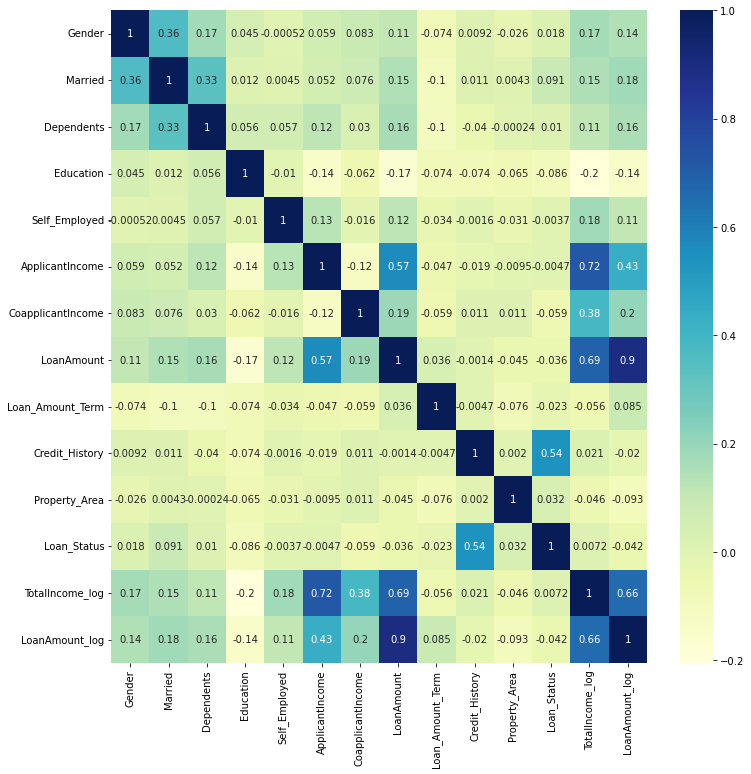

In [406]:
p.figure(figsize=(12,12))
dataplot2 = sn.heatmap(Training_Data.corr(), cmap="YlGnBu", annot=True)
p.show()

2)We now select the features:
Gender,Married,Dependants,Education,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome_log

In [407]:
X=Training_Data[["Gender","Married","Dependents","Education","Loan_Amount_Term","Credit_History","Property_Area",
               "TotalIncome_log"]].values


In [408]:
X

array([[1.        , 0.        , 0.        , ..., 1.        , 2.        ,
        8.67402599],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        8.71456755],
       [1.        , 1.        , 0.        , ..., 1.        , 2.        ,
        8.00636757],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 2.        ,
        9.02545553],
       [1.        , 1.        , 2.        , ..., 1.        , 2.        ,
        8.93366418],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        8.43010908]])

3)We take the Target Variable as Loan_Status

In [409]:
Y=Training_Data["Loan_Status"].values

In [410]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

# Training and Validating the Accuracy

1)We split our X and Y into train and test datasets

In [411]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [412]:
X_train

array([[1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        9.46629955],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        8.87612559],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        8.42661181],
       ...,
       [1.        , 1.        , 3.        , ..., 1.        , 1.        ,
        9.02809881],
       [1.        , 1.        , 0.        , ..., 1.        , 2.        ,
        8.70499968],
       [0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        8.77740129]])

In [413]:
X_test

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        8.86573515],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        8.34995727],
       [1.        , 1.        , 0.        , ..., 1.        , 2.        ,
        9.21423279],
       ...,
       [0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        8.06022424],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        8.08641028],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        8.49596955]])

In [414]:
Y_train

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [415]:
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

2)We apply StandardScaler to our X_train,X_test

In [416]:
stdscaler=StandardScaler()
X_train=stdscaler.fit_transform(X_train)
X_test=stdscaler.fit_transform(X_test)

3)We train using Decision Tree Classifier to predict the output and test the accuracy

In [417]:
dc_classifier=DecisionTreeClassifier(random_state = 0)
dc_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [418]:
Y_test_predict_dt=dc_classifier.predict(X_test)

In [419]:
Y_test_predict_dt

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1])

In [420]:
print("The accurancy of Decision Tree Classifier is :\n",metrics.accuracy_score(Y_test,Y_test_predict_dt)*100,"%")

The accurancy of Decision Tree Classifier is :
 70.8108108108108 %


4)We train using Random Forest Classifier and predict the output and test the accuracy

In [421]:
rf_classifier=RandomForestClassifier(random_state = 0)
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [422]:
Y_test_predict_rf=rf_classifier.predict(X_test)

In [423]:
Y_test_predict_rf

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1])

In [424]:
print("The accurancy of Random Forest Classifier is :\n",metrics.accuracy_score(Y_test,Y_test_predict_rf)*100,"%")

The accurancy of Random Forest Classifier is :
 72.97297297297297 %


5)We train using Naive Bayes Classifier and predict the output and test the accuracy

In [425]:
nbc_classifier=GaussianNB()
nbc_classifier.fit(X_train,Y_train)

GaussianNB()

In [426]:
Y_test_predict_nb=nbc_classifier.predict(X_test)

In [427]:
Y_test_predict_nb

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [428]:
print("The accurancy of NBC is :\n",metrics.accuracy_score(Y_test,Y_test_predict_nb)*100,"%")

The accurancy of NBC is :
 82.70270270270271 %


6)We train the data using Logistic Regression and predict the output and test its accuracy

In [429]:
lg_regressor=LogisticRegression(random_state = 0)
lg_regressor.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [430]:
Y_test_predict_lg=lg_regressor.predict(X_test)

In [431]:
Y_test_predict_lg

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [432]:
print("The accurancy of Logistic Regression is :\n",metrics.accuracy_score(Y_test,Y_test_predict_lg)*100,"%")

The accurancy of Logistic Regression is :
 82.70270270270271 %


7)We compare all the 4 algorithms

In [433]:
algo=["DecisionTreeClassifier","RandomForestClassifier","NaiveBayesClassifier","LogisticRegression"]
accuracy=[metrics.accuracy_score(Y_test,Y_test_predict_dt)*100,metrics.accuracy_score(Y_test,Y_test_predict_rf)*100,
         metrics.accuracy_score(Y_test,Y_test_predict_nb)*100,metrics.accuracy_score(Y_test,Y_test_predict_lg)*100]
print(algo)
print(accuracy)

['DecisionTreeClassifier', 'RandomForestClassifier', 'NaiveBayesClassifier', 'LogisticRegression']
[70.8108108108108, 72.97297297297297, 82.70270270270271, 82.70270270270271]


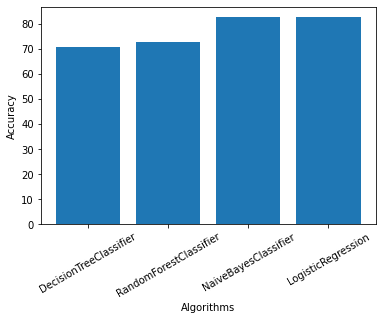

In [434]:
p.bar(algo, accuracy)
p.xticks(rotation = 30) 
p.ylabel("Accuracy")
p.xlabel("Algorithms")
p.show()

Based on the above accuracy scores we shall use the Naive Bayes Classifier and the Logistic Regression Models for the prediction of the loan status values for applicants in the test set.

# Reading Test Data and Test Data Cleaning

1)We read the test_set file and display it

In [435]:
Test_Data=pd.read_csv(r"./DataSet/test_set.csv")
Test_Data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [436]:
Test_Data.shape

(367, 12)

In [437]:
Test_Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [438]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


2)We Check for null values in the set

In [439]:
Test_Data.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [440]:
Test_Data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

3)We handle the null values using fillna() function

In [441]:
Test_Data["Gender"].fillna(Test_Data["Gender"].mode()[0],inplace=True)
Test_Data["Dependents"].fillna(Test_Data["Dependents"].mode()[0],inplace=True)
Test_Data["Self_Employed"].fillna(Test_Data["Self_Employed"].mode()[0],inplace=True)
Test_Data["LoanAmount"].fillna(Test_Data["LoanAmount"].mean(),inplace=True)
Test_Data["Loan_Amount_Term"].fillna(Test_Data["Loan_Amount_Term"].mode()[0],inplace=True)
Test_Data["Credit_History"].fillna(Test_Data["Credit_History"].mode()[0],inplace=True)

4)We check if the null value count has dropped to 0 or not

In [442]:
Test_Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

4)We check for Outliers and handle them 

<AxesSubplot:>

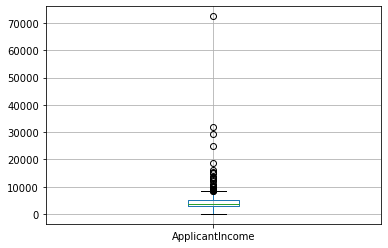

In [443]:
Test_Data.boxplot(column="ApplicantIncome")

<AxesSubplot:>

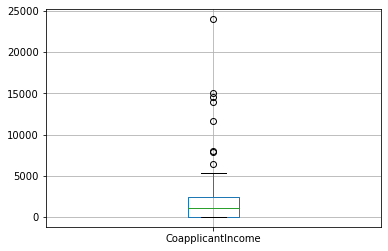

In [444]:
Test_Data.boxplot(column="CoapplicantIncome")

<AxesSubplot:>

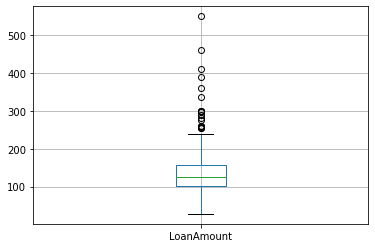

In [445]:
Test_Data.boxplot(column="LoanAmount")

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>]], dtype=object)

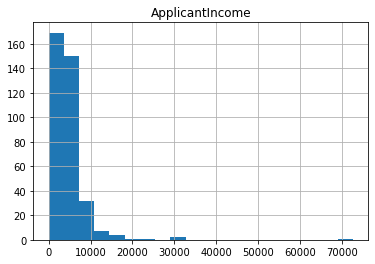

In [446]:
Test_Data.hist(column="ApplicantIncome", bins=20)

array([[<AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

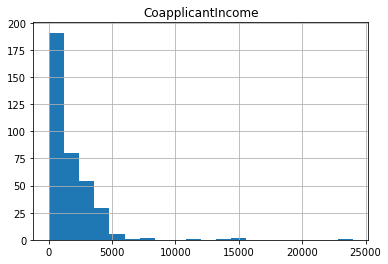

In [447]:
Test_Data.hist(column="CoapplicantIncome", bins=20)

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

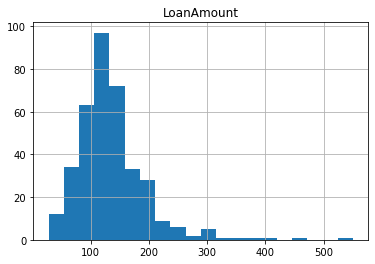

In [448]:
Test_Data.hist(column="LoanAmount", bins=20)

We see that the data are not normalized and hence we need to handle the data

In [449]:
Test_Data["LoanAmount_log"]=np.log(Test_Data["LoanAmount"])
Test_Data["TotalIncome_log"]=np.log(Test_Data["ApplicantIncome"]+Test_Data["CoapplicantIncome"])

5)We check the new columns and visualize them

In [450]:
Test_Data["TotalIncome_log"]

0      8.651724
1      8.428581
2      8.824678
3      8.494129
4      8.094378
         ...   
362    8.663196
363    8.490233
364    8.564649
365    8.908289
366    9.126959
Name: TotalIncome_log, Length: 367, dtype: float64

array([[<AxesSubplot:title={'center':'TotalIncome_log'}>]], dtype=object)

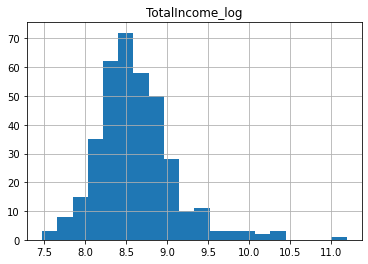

In [451]:
Test_Data.hist(column="TotalIncome_log", bins=20)

In [452]:
Test_Data["LoanAmount_log"]

0      4.700480
1      4.836282
2      5.337538
3      4.605170
4      4.356709
         ...   
362    4.727388
363    4.744932
364    4.836282
365    5.062595
366    4.584967
Name: LoanAmount_log, Length: 367, dtype: float64

array([[<AxesSubplot:title={'center':'LoanAmount_log'}>]], dtype=object)

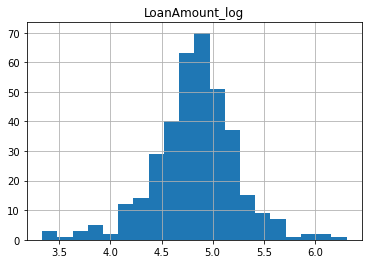

In [453]:
Test_Data.hist(column="LoanAmount_log", bins=20)

# Test Data Feature Engineering

1)We use a LabelEncoder and then display the dataset

In [454]:
LE_Test_Data=LabelEncoder()
Test_Data["Gender"]=LE_Test_Data.fit_transform(Test_Data["Gender"])
Test_Data["Married"]=LE_Test_Data.fit_transform(Test_Data["Married"])
Test_Data["Dependents"]=LE_Test_Data.fit_transform(Test_Data["Dependents"])
Test_Data["Education"]=LE_Test_Data.fit_transform(Test_Data["Education"])
Test_Data["Self_Employed"]=LE_Test_Data.fit_transform(Test_Data["Self_Employed"])
Test_Data["Property_Area"]=LE_Test_Data.fit_transform(Test_Data["Property_Area"])

In [455]:
Test_Data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480,8.651724
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282,8.428581
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538,8.824678
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170,8.494129
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709,8.094378


# Test Data Feature Selection

1)We select the features as we have selected in our Training Set

In [456]:
XTest=Test_Data[["Gender","Married","Dependents","Education","Loan_Amount_Term","Credit_History","Property_Area",
               "TotalIncome_log"]].values


In [457]:
XTest

array([[1.        , 1.        , 0.        , ..., 1.        , 2.        ,
        8.65172408],
       [1.        , 1.        , 1.        , ..., 1.        , 2.        ,
        8.42858053],
       [1.        , 1.        , 2.        , ..., 1.        , 2.        ,
        8.82467789],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        8.56464913],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        8.90828889],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        9.12695876]])

2)We use a standardscaler on XTest

In [458]:
XTest=stdscaler.fit_transform(XTest)

# Predicting The Loan Status 

1)We use the NBC model to predict the loan status value

In [459]:
YTest_NB=nbc_classifier.predict(XTest)

In [460]:
YTest_NB

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

The above is the predicted value of Loan Status of the Test_Data set where 1 means "Yes" and 0 means "No"

2)We use Logistic Regressor model to predict the loan status value

In [461]:
YTest_LR=lg_regressor.predict(XTest)

In [462]:
YTest_LR

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

3)We check the percentage of predictions matching between the two models

In [463]:
print("The percentage of predictions matching between the two models are:",metrics.accuracy_score(YTest_NB,YTest_LR)*100,"%")

The percentage of predictions matching between the two models are: 99.72752043596729 %
